## JULIAN GRIJALBA FACUNDO

# Actividad 1: Deep Vision

En esta actividad, el alumno debe evaluar y comparar dos estrategias para la clasificación de imágenes en el dataset Caltech 101. El dataset ha sido preprocesado y guardado utilizando pickle (más información sobre el preprocesado se puede obtener en el notebook "preprocesado_caltech101" https://drive.google.com/open?id=1ioVl25t1p3mE2lTUFTwwOFi3fHFgUvtb).

Las instrucciones de cómo obtener el dataset aparecen al inicio de este notebook.

### Estrategia 1: Red pre-entrenada

La primera estrategia a comparar debe incluir la utilización de una red preentrenada con el dataset ImageNet, pero en la que la capa densa (el clasificador) debe entrenarse para clasificar los objetos de Caltech 101. Deben compararse al menos dos tipos de arquitecturas (VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/)

### Estrategia 2: Entrenar desde cero

La segunda estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de atributos, capas y parámetros a los que se ha llegado. Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal.

## Normas a seguir

- Se debe entregar un notebook que incluya las instrucciones presentes
- El notebook, junto a cualquier archivo necesario, __deberá entregarse como un link compartido__ en una carpeta gdrive
- Aunque los alumnos pueden trabajar en sus propios ordenadores, __la entrega deberá hacerse como un notebook en google colaboratory__, de forma que el profesor pueda abrir y ejectutar el código desde Google Colab sin necesitar alteraciones (salvo el cambio de BASE_FOLDER)
- Las __redes utilizadas deben estar entrenadas y ser cargadas__ desde un archivo. La entrega de una red sin entrenar supondrá perdidad de puntos.
- Si se desea __evidenciar alguna métrica__ del proceso de entrenamiento (precisión, pérdida, etc), estas deben ser generadas y guardadas, y __mostradas en el notebook final solo como imagen__.
- Todos los archivos que deban adjuntarse a la actividad __deberán incluirse en la carpeta gdrive compartida__, y el notebook debe hacer referencias parciales a los mismos.
- Tanto __la carga de archivos como guardar datos a archivos__ deberán siempre __contener referencias parciales__ con respecto a un directorio base (__BASE_FOLDER__).  En este notebook se incluye un ejemplo de cómo cargar datos utilizando un directorio base.



## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- Se deberá incluir mediante un link de acceso público, tanto el notebook como cualquier archivo que se utilice en el mismo. En el notebook se deberán cargar los modelos a través de estos archivos.
- El código debe poder ejecutarse sin modificación alguna (salvo el cambio de BASE_DIRECTORY) en Google Colaboratory.

#Estrategia 1: Red pre-entrenada
### Obtención del dataset preprocesado Caltech 101
A partir de Caltech 101 dataset 
- original en http://www.vision.caltech.edu/Image_Datasets/Caltech101/#Download
- preprocesado subido al gdrive https://drive.google.com/drive/folders/1i5IMma8V1sOjUpN1BlArJK_VI5ltjV8K?usp=sharing


Se crean función reutilizable para graficar y guardar los resultados obtenidos

In [1]:
from numba import cuda
from keras import backend as K
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)

# graficar modelos
def limpiarRAM():
  K.clear_session()
  cuda.select_device(0)
  cuda.close()


# Visualiza y guarda los modelos pre-construidos
def guardarResultado(la_red,origen,experimento,algoritmo):


  imagen=BASE_FOLDER+'Imagenes/' +algoritmo+'-'+experimento+'.png'
  modelo=BASE_FOLDER + 'Modelos/'  +algoritmo+'-'+experimento+'.h5'
  resultado=BASE_FOLDER + 'Modelos/'  +algoritmo+'-'+experimento+'.txt'
  # se guarda el modelo original
  origen.save(modelo)
  # se grafican los resultados de validación
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False)
  fig.suptitle(algoritmo, fontsize=20)
  ax1.plot(la_red.history['loss'], label = 'train')
  ax1.plot(la_red.history['val_loss'], label = 'test')
  ax1.legend()
  ax1.set_title('Loss Function')
  ax2.plot(la_red.history['acc'], label = 'train')
  ax2.plot(la_red.history['val_acc'], label = 'test')
  ax2.legend()
  ax2.set_title('Accuracy')
  fig = plt.gcf()
  fig.set_size_inches(16, 5)
  plt.savefig(imagen, bbox_inches='tight')
  plt.show()
  metrica = origen.evaluate(x_test, processed_y_test, verbose=1)
  print('Test loss:', metrica[0])
  print('Test accuracy:', metrica[1])
  # Se guarda el resultado
  with open(resultado, 'wb') as file_pi:  
    pickle.dump(la_red.history, file_pi)
  
  
  return metrica

def graficarComparaciones():
  modelo=BASE_FOLDER + 'Modelos/'
  # se cargar los resultados
  with open(modelo + 'VGG16-EXP1.txt', 'rb') as f:  
    vgg16 = pickle.load(f)
  with open(modelo + 'VGG19-EXP1.txt', 'rb') as f:  
    vgg19 = pickle.load(f)
  with open(modelo + 'Xception-EXP1.txt', 'rb') as f:  
    Xcep = pickle.load(f)
  with open(modelo + 'ResNet50-EXP1.txt', 'rb') as f:  
    Res = pickle.load(f)
  with open(modelo + 'InceptionV3-EXP1.txt', 'rb') as f:  
    Inc = pickle.load(f)        
  # se grafican los resultados de validación
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False)
  fig.suptitle("Comparación de los Modelos", fontsize=20)
  ax1.plot(vgg16['val_acc'],'y')  
  ax1.plot(vgg19['val_acc'],'g')  
  ax1.plot(Xcep['val_acc'],'b')  
  ax1.plot(Res['val_acc'],'r')
  ax1.plot(Inc['val_acc'],'k') 
  ax1.set_xlabel("No. de Epochs")  
  ax1.set_ylabel("Accuracy")  
  ax1.legend(['VGG 16','VGG 19','Xception','ResNet50','Inception V3']) 

  ax2.plot(vgg16['val_loss'],'y')  
  ax2.plot(vgg19['val_loss'],'g')  
  ax2.plot(Xcep['val_loss'],'b')  
  ax2.plot(Res['val_loss'],'r')
  ax2.plot(Inc['val_loss'],'k') 
  ax2.set_xlabel("No. de Epochs")  
  ax2.set_ylabel("Loss")  
  ax2.legend(['VGG 16','VGG 19','Xception','ResNet50','Inception V3']) 

  fig = plt.gcf()
  fig.set_size_inches(16, 5)
  plt.savefig(modelo+'Comparacion_resultados.jpg', bbox_inches='tight')
  plt.show()

  
def graficarComparaciones2():
  modelo=BASE_FOLDER + 'Modelos/'
  # se cargar los resultados
  with open(modelo + 'VGG16-EXP1.txt', 'rb') as f:  
    vgg16 = pickle.load(f)
  with open(modelo + 'VGG19-EXP1.txt', 'rb') as f:  
    vgg19 = pickle.load(f)
  with open(modelo + 'Xception-EXP1.txt', 'rb') as f:  
    Xcep = pickle.load(f)
  with open(modelo + 'ResNet50-EXP1.txt', 'rb') as f:  
    Res = pickle.load(f)
  with open(modelo + 'InceptionV3-EXP1.txt', 'rb') as f:  
    Inc = pickle.load(f)
  with open(modelo + 'Propia V1-EXP1.txt', 'rb') as f:  
    pr1 = pickle.load(f)  
  with open(modelo + 'Propia V2-EXP2.txt', 'rb') as f:  
    pr2 = pickle.load(f)  
  # se grafican los resultados de validación
  fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False)
  fig.suptitle("Comparación de los Modelos incluyendo los nuevos modelos ", fontsize=20)
  ax1.plot(vgg16['val_acc'],'y')  
  ax1.plot(vgg19['val_acc'],'g')  
  ax1.plot(Xcep['val_acc'],'b')  
  ax1.plot(Res['val_acc'],'r')
  ax1.plot(Inc['val_acc'],'k') 
  ax1.plot(pr1['val_acc'],'c') 
  ax1.plot(pr2['val_acc'],'m') 
  ax1.set_xlabel("No. de Epochs")  
  ax1.set_ylabel("Accuracy")
  ax1.legend(['VGG 16','VGG 19','Xception','ResNet50','Inception V3','Propia V1','Propia V2']) 

  ax2.plot(vgg16['val_loss'],'y')  
  ax2.plot(vgg19['val_loss'],'g')  
  ax2.plot(Xcep['val_loss'],'b')  
  ax2.plot(Res['val_loss'],'r')
  ax2.plot(Inc['val_loss'],'k') 
  ax2.plot(pr1['val_loss'],'c') 
  ax2.plot(pr2['val_loss'],'m')
  ax2.set_xlabel("No. de Epochs")  
  ax2.set_ylabel("Loss")
  ax2.legend(['VGG 16','VGG 19','Xception','ResNet50','Inception V3','Propia V1','Propia V2'])  
  
  fig = plt.gcf()
  fig.set_size_inches(16, 5)
  plt.savefig(modelo+'Comparacion_resultados.jpg', bbox_inches='tight')
  plt.show()
  
def genenarTablaExperimentos():
  import pandas as pd
  archivo=BASE_FOLDER + 'Modelos/resultados_modelos.xlsx'
  df = pd.read_excel (archivo, sheet_name='Hoja1')
  print (df)
  
def resolverImagen(imagen):  
  import keras
  import numpy as np
  from keras.preprocessing.image import load_img
  from keras.preprocessing.image import img_to_array
  from keras.applications.imagenet_utils import decode_predictions
  from keras.applications import vgg16, vgg19, inception_v3, resnet50, xception
  from operator import itemgetter 
  import matplotlib.pyplot as plt
  import cv2
  filename = BASE_FOLDER+'Imagenes/'+str(imagen)+'.JPG'
  #convertir imagenes
  original = load_img(filename, target_size=(224, 224))
  numpy_image = img_to_array(original)
  image_batch = np.expand_dims(numpy_image, axis=0)
  #crear las arquitecturas base
  vgg16_redcv = vgg16.VGG16(weights='imagenet')
  vgg19_redcv = vgg19.VGG19(weights='imagenet')
  inception_redcv = inception_v3.InceptionV3(weights='imagenet')
  resnet_redcv = resnet50.ResNet50(weights='imagenet')
  xception_redcv = xception.Xception(weights='imagenet')
  #VGG16
  procesado = vgg16.preprocess_input(image_batch.copy())
  predictions = vgg16_redcv.predict(procesado)
  vgg16_labels = decode_predictions(predictions)
  #VGG19
  x = vgg19.preprocess_input(image_batch.copy())
  predictions = vgg19_redcv.predict(x)
  vgg19_labels = decode_predictions(predictions)
  #Inception
  original_incp = load_img(filename, target_size=(299, 299))
  numpy_image_incp = img_to_array(original_incp)
  image_batch_incp = np.expand_dims(numpy_image_incp, axis=0)
  procesado = inception_v3.preprocess_input(image_batch_incp.copy())
  predictions = inception_redcv.predict(procesado)
  inception_labels = decode_predictions(predictions)
  ## Xception
  procesado = xception.preprocess_input(image_batch_incp.copy())
  predictions = xception_redcv.predict(procesado)
  xception_labels = decode_predictions(predictions)
  ## ResNet
  procesado = resnet50.preprocess_input(image_batch.copy())
  predictions = resnet_redcv.predict(procesado)
  resnet_labels = decode_predictions(predictions)
  ## Crear la imagen final
  numpy_image = np.uint8(img_to_array(original)).copy()
  numpy_image = cv2.resize(numpy_image,(700,900))
  salida_image = BASE_FOLDER+'Imagenes/Imagen_Modelos_aplicados_'+str(imagen)+'.JPG'
  cv2.putText(numpy_image, "VGG16: {}, {:.3f}".format(vgg16_labels[0][0][1], vgg16_labels[0][0][2]) , (0, 740), cv2.cv2.FONT_ITALIC, 1, (0, 0, 0), 3)
  cv2.putText(numpy_image, "VGG19: {}, {:.3f}".format(vgg19_labels[0][0][1], vgg19_labels[0][0][2]) , (0, 780), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
  cv2.putText(numpy_image, "Inception V3: {}, {:.3f}".format(inception_labels[0][0][1], inception_labels[0][0][2]) , (0, 810), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
  cv2.putText(numpy_image, "Xception: {}, {:.3f}".format(xception_labels[0][0][1], xception_labels[0][0][2]) , (0, 840), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
  cv2.putText(numpy_image, "ResNet: {}, {:.3f}".format(resnet_labels[0][0][1], resnet_labels[0][0][2]) , (0, 870), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
  numpy_image = cv2.resize(numpy_image, (500,700))
  cv2.imwrite(salida_image,cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))
  plt.figure(figsize=[5,8])
  plt.imshow(numpy_image)
  plt.axis('off')  
  #Label finales
  print("Valores y probabilidad generadas por los modelos:")
  print("VGG16: "+str(vgg16_labels))
  print("VGG19: "+str(vgg19_labels))
  print("Inception V3: "+str(inception_labels))
  print("Xception: "+str(xception_labels))
  print("ResNet: "+str(resnet_labels))

Using TensorFlow backend.


## Preprocesamiento de la data y visualización

In [2]:
###################################################################################################
# La utilizacion de un directorio base es obligatoria
# Todas las referencias al disco duro (guardar o cargar) deberan tener esta variable como base
###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/Actividades/'
###################################################################################################

from google.colab import drive
drive.mount('/content/drive/')
# Librerias requeridas
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tarfile
import pickle

# ejecución de matplot
%matplotlib inline

###################################################################################################
# Ejemplo de como cargar de archivos con referencia al directorio base
###################################################################################################

# DESCARGAR Y DESCOMPRIMIR EL DATASET CALTECH_PREPROCESADO DEL GDRIVE
# Cargar las ndarrays
with open(BASE_FOLDER+"pickle_all_images_df.pickle", "rb") as input_file:
    datos = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    descriptores = pickle.load(input_file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Se visualizan algunas imágenes

La imagen 129 - visualizada es: airplanes


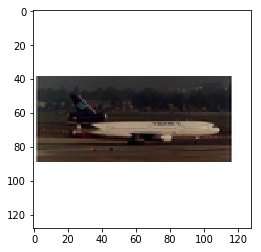

In [4]:
imagen = plt.imshow(datos[200])
print("La imagen 129 - visualizada es: " + str(descriptores[129]))
plt.show()

La imagen 100 - visualizada es: accordion


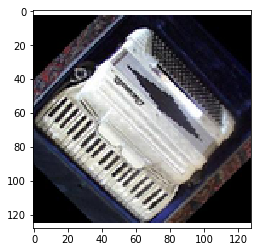

In [5]:
imagen = plt.imshow(datos[10])
print("La imagen 100 - visualizada es: " + str(descriptores[10]))
plt.show()

Se realiza a continuación distribución de los datos con el objetivo de tener los conjuntos de datos de train y test, los cuales se comparán con las visualizaciones previas para asegurar que sus índices son diferentes:

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datos, descriptores, test_size=0.30, random_state=5)

La imagen 100 Train - visualizada es: ketch


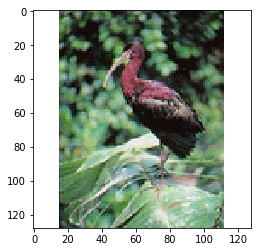

In [10]:
imagen = plt.imshow(x_train[200])
print("La imagen 100 Train - visualizada es: " + str(y_train[100]))
plt.show()

La imagen 100 Test -  visualizada es: ant


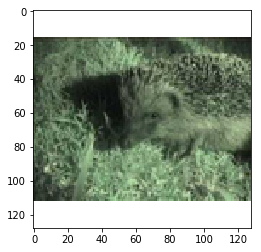

In [11]:
imagen = plt.imshow(x_test[200])
print("La imagen 100 Test -  visualizada es: " + str(y_test[100]))
plt.show()

Se transforman los datos de los descritores de tal forma que puedan ser categorizados . <br>
Se aplica Data Augmentation para mejorar el dataset actual definiendo variaciones de las imagenes usadas

In [0]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
# 1. Codificar los labels
# Train
y = np.unique(y_train)
tamano_y = len(y)
mapping = { key : value for key,value in zip(y,range(len(y)))}
processed_y_train = np.array([mapping[i] for i in y_train])
# Test 
y = np.unique(y_test)
mapping = { key : value for key,value in zip(y,range(len(y)))}
processed_y_test = np.array([mapping[i] for i in y_test])

# 2. Convertir los valores a categoricos
# Train
processed_y_train = to_categorical(processed_y_train)
# Test 
processed_y_test = to_categorical(processed_y_test)

# 3. Data augmentation
NewData = ImageDataGenerator(
    rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0, 
    zoom_range=0.1, horizontal_flip=True, fill_mode='nearest',  channel_shift_range=0.2)
NewData.fit(x_train)

## Uso de los modelos antes de su análisis

Con el fin de probar los modelos , se cargaran dos imágenes una de un perro y otra de un gato. Estas imagenes se encuentra en la carpeta Imagenes del drive <br>
El objetivo de esta prueba es visualizar las arquitecturas y su comportamiento. <br>Todos los resultados de los labels generados por las redes se visualizarán, y la que tenga la mayor probabilidad se agregará en la imagen de prueba.
<br> Para el caso del perro , los unicos modelos que coinciden es VGG16  y ResNet con Norfolk_terrier, los otros modelos aunque tambien tienen esta descripción lo tienen con una menor probabilidad. Sin embargo en el caso del gato practicamente VGG16, VGG19 y ResNet coinciden en su descripcion, Xception e Inception tienen la clasificación correcta. 


Valores y probabilidad generadas por los modelos:
VGG16: [[('n02094114', 'Norfolk_terrier', 0.34351557), ('n02100877', 'Irish_setter', 0.15189748), ('n02099601', 'golden_retriever', 0.107215), ('n02102318', 'cocker_spaniel', 0.09170681), ('n02085620', 'Chihuahua', 0.044475783)]]
VGG19: [[('n02085620', 'Chihuahua', 0.34046164), ('n02112706', 'Brabancon_griffon', 0.16442686), ('n02094114', 'Norfolk_terrier', 0.11808902), ('n02094258', 'Norwich_terrier', 0.045039557), ('n02102318', 'cocker_spaniel', 0.044531733)]]
Inception V3: [[('n02102318', 'cocker_spaniel', 0.2934633), ('n02099601', 'golden_retriever', 0.23203866), ('n02102480', 'Sussex_spaniel', 0.06514096), ('n02100877', 'Irish_setter', 0.053160522), ('n02101388', 'Brittany_spaniel', 0.030786173)]]
Xception: [[('n02102480', 'Sussex_spaniel', 0.5191954), ('n02094114', 'Norfolk_terrier', 0.034670625), ('n02102318', 'cocker_spaniel', 0.02810164), ('n02112137', 'chow', 0.022512667), ('n02099601', 'golden_retriever', 0.017435431)]]
ResNe

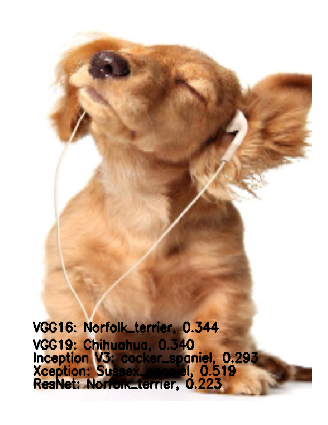

In [6]:
resolverImagen('Test1') # perro

Valores y probabilidad generadas por los modelos:
VGG16: [[('n02124075', 'Egyptian_cat', 0.28093034), ('n04589890', 'window_screen', 0.09055009), ('n02123045', 'tabby', 0.087527685), ('n02123159', 'tiger_cat', 0.07429972), ('n02971356', 'carton', 0.042960554)]]
VGG19: [[('n02124075', 'Egyptian_cat', 0.65562886), ('n02123045', 'tabby', 0.13912044), ('n02123159', 'tiger_cat', 0.12910406), ('n02127052', 'lynx', 0.028413512), ('n04589890', 'window_screen', 0.009285736)]]
Inception V3: [[('n02123159', 'tiger_cat', 0.5721155), ('n02124075', 'Egyptian_cat', 0.2281087), ('n02123045', 'tabby', 0.14749748), ('n02971356', 'carton', 0.002733583), ('n03958227', 'plastic_bag', 0.0026436218)]]
Xception: [[('n02123159', 'tiger_cat', 0.40650105), ('n02123045', 'tabby', 0.1717858), ('n02124075', 'Egyptian_cat', 0.1363959), ('n02127052', 'lynx', 0.007212557), ('n02971356', 'carton', 0.0038752402)]]
ResNet: [[('n02124075', 'Egyptian_cat', 0.501086), ('n02342885', 'hamster', 0.13926007), ('n02808304', 'bat

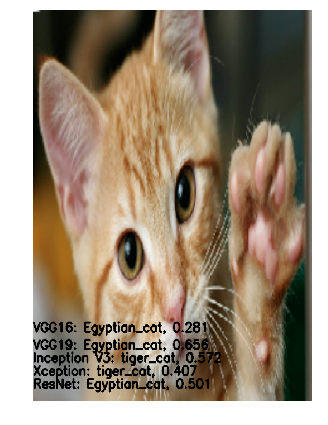

In [5]:
resolverImagen('Test2') # gato

# Escenario 1
## 1.1 Algoritmo VGG16 

Se procede a utilizar el modelo VGG16.
<br>El mejor resultado se da con los parametros BATCH SIZE:34, EPOCHS:10, STEPS PER EPOC:75, VALIDATION STEPS:8.
<br>La siguiente ejecución se realiza con base en 10 epoch para ser usada en la comparación de los modelos.

W0624 04:17:35.498309 140597991954304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 04:17:35.531788 140597991954304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 04:17:35.537154 140597991954304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 04:17:35.567040 140597991954304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0624 04:17:36.114262 140597991954304 deprecation_wrapp

Epoch 1/10
75/75 [==============================] - 20s 271ms/step - loss: 2.6530 - acc: 0.4545 - val_loss: 1.5958 - val_acc: 0.6163
Epoch 2/10
75/75 [==============================] - 13s 180ms/step - loss: 1.4880 - acc: 0.6357 - val_loss: 1.2624 - val_acc: 0.6833
Epoch 3/10
75/75 [==============================] - 14s 183ms/step - loss: 1.0908 - acc: 0.7090 - val_loss: 1.1363 - val_acc: 0.7077
Epoch 4/10
75/75 [==============================] - 14s 182ms/step - loss: 0.9109 - acc: 0.7506 - val_loss: 1.1028 - val_acc: 0.7227
Epoch 5/10
75/75 [==============================] - 14s 184ms/step - loss: 0.9288 - acc: 0.7525 - val_loss: 1.0019 - val_acc: 0.7526
Epoch 6/10
75/75 [==============================] - 14s 184ms/step - loss: 0.6516 - acc: 0.8133 - val_loss: 0.9143 - val_acc: 0.7690
Epoch 7/10
75/75 [==============================] - 14s 187ms/step - loss: 0.6746 - acc: 0.8075 - val_loss: 0.9485 - val_acc: 0.7719
Epoch 8/10
75/75 [==============================] - 14s 186ms/step - 

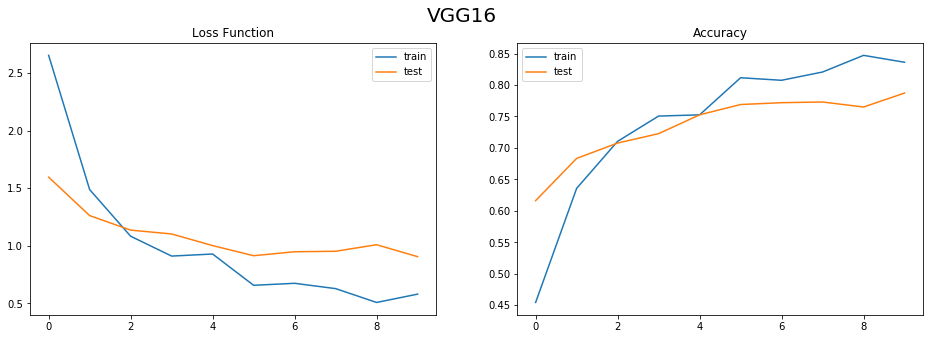

2744/2744 [==============================] - 6s 2ms/step
Test loss: 0.9059205249864228
Test accuracy: 0.7871720114880331


In [14]:
from keras.applications import VGG16
from keras import backend as K
from keras import models
from keras import layers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers.core import Dense, Flatten, Dropout

# Se crea la red 
model_vgg16 = VGG16(weights='imagenet',include_top=False, input_shape=(128,128,3))
#Se desactiva para evitar que los pesos se actualicen cuando convolucione
model_vgg16.trainable = False 
# Se crea la arquitectura
redVGG16 = models.Sequential()
redVGG16.add(model_vgg16)
redVGG16.add(layers.Flatten())
redVGG16.add(layers.Dense(tamano_y, activation='softmax'))
# se compila y ejecuta 
redVGG16.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_vgg16 = redVGG16.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_steps=8,validation_data=(x_test, processed_y_test))
metrica_vgg16=guardarResultado(resultado_vgg16,redVGG16,'EXP1','VGG16')


## 1.2 Algoritmo VGG19 

Se procede a utilizar el modelo VGG19.
<br>El mejor resultado se da con los parametros BATCH SIZE:60, EPOCHS:10, STEPS PER EPOC:75 .
<br>La siguiente ejecución se realiza con base en 10 epoch para ser usada en la comparación de los modelos.

Epoch 1/10
75/75 [==============================] - 18s 235ms/step - loss: 2.8364 - acc: 0.4129 - val_loss: 1.8158 - val_acc: 0.5645
Epoch 2/10
75/75 [==============================] - 16s 218ms/step - loss: 1.7310 - acc: 0.5725 - val_loss: 1.4101 - val_acc: 0.6399
Epoch 3/10
75/75 [==============================] - 16s 214ms/step - loss: 1.3202 - acc: 0.6625 - val_loss: 1.2535 - val_acc: 0.6808
Epoch 4/10
75/75 [==============================] - 16s 214ms/step - loss: 1.0600 - acc: 0.7153 - val_loss: 1.1521 - val_acc: 0.7154
Epoch 5/10
75/75 [==============================] - 16s 213ms/step - loss: 1.0946 - acc: 0.7216 - val_loss: 1.0449 - val_acc: 0.7405
Epoch 6/10
75/75 [==============================] - 16s 212ms/step - loss: 0.8636 - acc: 0.7658 - val_loss: 1.1276 - val_acc: 0.7256
Epoch 7/10
75/75 [==============================] - 16s 213ms/step - loss: 0.8306 - acc: 0.7702 - val_loss: 1.0731 - val_acc: 0.7365
Epoch 8/10
75/75 [==============================] - 16s 213ms/step - 

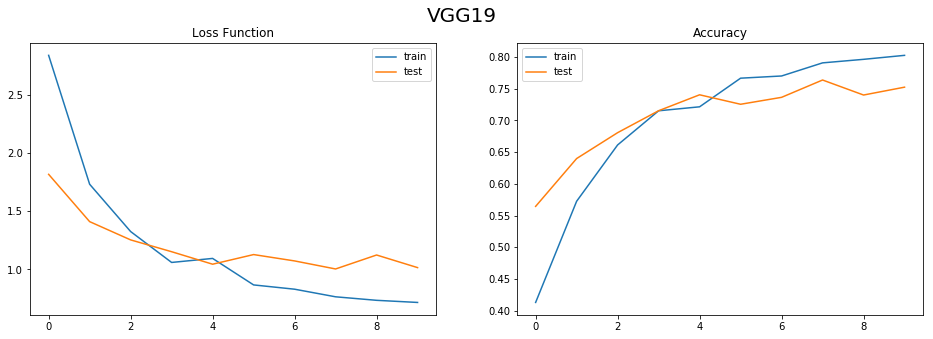

2744/2744 [==============================] - 6s 2ms/step
Test loss: 1.0157137057871581
Test accuracy: 0.7525510204081632


In [16]:
from keras.applications import VGG19

# Se crea la red 
model_vgg19 = VGG19(weights='imagenet',include_top=False, input_shape=(128,128,3))
#Se desactiva para evitar que los pesos se actualicen cuando convolucione
model_vgg19.trainable = False 
# Se crea la arquitectura
redVGG19 = models.Sequential()
redVGG19.add(model_vgg19)
redVGG19.add(layers.Flatten())
redVGG19.add(layers.Dense(tamano_y, activation='softmax'))
# se compila y ejecuta 
redVGG19.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_vgg19 = redVGG19.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_steps=8,validation_data=(x_test, processed_y_test))
metrica_vgg19=guardarResultado(resultado_vgg19,redVGG19,'EXP1','VGG19')

## 1.3 Algoritmo Xception 

Se procede a utilizar el modelo Xception.
<br>El mejor resultado se da con los parametros BATCH SIZE:34, EPOCHS:10, STEPS PER EPOC:75.
<br>La siguiente ejecución se realiza con base en 10 epoch para ser usada en la comparación de los modelos.

W0624 04:33:53.101381 140597991954304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Epoch 1/10
75/75 [==============================] - 18s 242ms/step - loss: 4.3859 - acc: 0.4388 - val_loss: 3.7325 - val_acc: 0.5266
Epoch 2/10
75/75 [==============================] - 13s 175ms/step - loss: 2.5685 - acc: 0.6157 - val_loss: 4.1523 - val_acc: 0.5361
Epoch 3/10
75/75 [==============================] - 13s 177ms/step - loss: 2.1669 - acc: 0.6840 - val_loss: 3.4182 - val_acc: 0.6013
Epoch 4/10
75/75 [==============================] - 13s 175ms/step - loss: 1.8233 - acc: 0.7392 - val_loss: 3.5742 - val_acc: 0.6060
Epoch 5/10
75/75 [==============================] - 13s 174ms/step - loss: 1.9218 - acc: 0.7239 - val_loss: 3.3023 - val_acc: 0.6461
Epoch 6/10
75/75 [==============================] - 13s 173ms/step - loss: 1.5286 - acc: 0.7593 - val_loss: 3.3932 - val_acc: 0.6447
Epoch 7/10
75/75 [==============================] - 13s 177ms/step - loss: 1.5946 - acc: 0.7788 - val_loss: 3.4238 - val_acc: 0.6487
Epoch 8/10
75/75 [==============================] - 13s 174ms/step - 

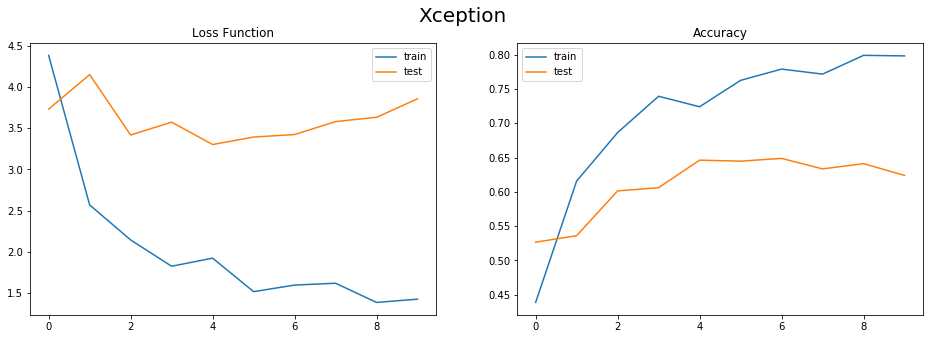

2744/2744 [==============================] - 6s 2ms/step
Test loss: 3.8577022135431496
Test accuracy: 0.6239067053655841


In [17]:
from keras.applications import Xception
 
# Se crea la red 
modelo_XCE = Xception(weights='imagenet',include_top=False, input_shape=(128,128,3))
modelo_XCE.trainable = False 

# Se crea la arquitectura
redXCE = models.Sequential()
redXCE.add(modelo_XCE)
redXCE.add(layers.Flatten())
redXCE.add(layers.Dense(tamano_y, activation='softmax'))

# se compila y ejecuta 
redXCE.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_xce = redXCE.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_data=(x_test, processed_y_test))
metrica_xce=guardarResultado(resultado_xce,redXCE,'EXP1','Xception')

## 1.4 Algoritmo Resnet 

Se procede a utilizar el modelo Resnet.<br>
El mejor resultado se da con los parametros BATCH SIZE:34, EPOCHS:10, STEPS PER EPOC:75, VALIDATION STEPS:8.<br>
La siguiente ejecución se realiza con base en 10 epoch para ser usada en la comparación de los modelos.

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Epoch 1/10
75/75 [==============================] - 20s 261ms/step - loss: 7.0152 - acc: 0.4427 - val_loss: 4.7400 - val_acc: 0.0463
Epoch 2/10
75/75 [==============================] - 13s 169ms/step - loss: 3.6207 - acc: 0.6455 - val_loss: 5.0462 - val_acc: 0.0459
Epoch 3/10
75/75 [==============================] - 13s 170ms/step - loss: 2.8030 - acc: 0.7198 - val_loss: 5.2561 - val_acc: 0.0838
Epoch 4/10
75/75 [==============================] - 13s 171ms/step - loss: 2.1480 - acc: 0.7847 - val_loss: 5.7714 - val_acc: 0.0860
Epoch 5/10
75/75 [==============================] - 13s 169ms/step - loss: 2.3302 - acc: 0.7757 - val_loss: 6.0992 - val_acc: 0.0510
Epoch 6/10
75/75 [==============================] - 13s 167ms/step - loss: 1.6476 - acc: 0.8355 - val_loss: 6.2649 - val_acc: 0.0612
Epoch 7/10
75/75 [==============================] - 13s 168ms/step - loss: 1.6271 - acc: 0.8329 - val_loss: 6.0915 - val_acc: 0.0543
Epoch 8/10
75/75 [==============================] - 13s 167ms/step - 

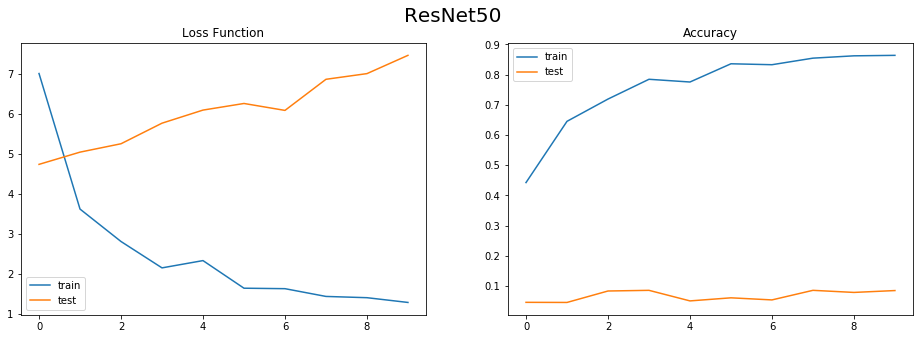

2744/2744 [==============================] - 5s 2ms/step
Test loss: 7.469916773259466
Test accuracy: 0.08527696797347277


In [18]:
## Procedemos a usar Resnet
from keras.applications import ResNet50
from keras import models
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers.core import Dense, Flatten, Dropout
# Se crea la red 
modelo_RESNET = ResNet50(weights='imagenet',include_top=False, input_shape=(128,128,3))
modelo_RESNET.trainable = False 

# Se crea la arquitectura
redRES = models.Sequential()
redRES.add(modelo_RESNET)
redRES.add(layers.Flatten())
redRES.add(layers.Dense(tamano_y, activation='softmax'))

# se compila y ejecuta 
redRES.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_resnet = redRES.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_data=(x_test, processed_y_test))
metrica_resnet=guardarResultado(resultado_resnet,redRES,'EXP1','ResNet50')

## 1.5 Algoritmo Inception V3 

Se procede a utilizar el modelo Inception V3.<br>
El mejor resultado se da con los parametros BATCH SIZE:34, EPOCHS:10, STEPS PER EPOC:75, VALIDATION STEPS:8.<br>
La siguiente ejecución se realiza con base en 10 epoch para ser usada en la comparación de los modelos.

W0624 04:44:08.266431 140597991954304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



Epoch 1/10
75/75 [==============================] - 22s 293ms/step - loss: 4.1234 - acc: 0.3008 - val_loss: 5.3786 - val_acc: 0.4162
Epoch 2/10
75/75 [==============================] - 11s 149ms/step - loss: 2.6335 - acc: 0.4929 - val_loss: 4.0180 - val_acc: 0.5598
Epoch 3/10
75/75 [==============================] - 11s 149ms/step - loss: 2.3866 - acc: 0.5352 - val_loss: 3.6541 - val_acc: 0.6232
Epoch 4/10
75/75 [==============================] - 11s 149ms/step - loss: 2.0509 - acc: 0.5871 - val_loss: 4.2585 - val_acc: 0.5660
Epoch 5/10
75/75 [==============================] - 11s 150ms/step - loss: 1.9716 - acc: 0.6149 - val_loss: 3.9363 - val_acc: 0.6093
Epoch 6/10
75/75 [==============================] - 11s 149ms/step - loss: 1.8067 - acc: 0.6423 - val_loss: 3.5974 - val_acc: 0.6323
Epoch 7/10
75/75 [==============================] - 11s 153ms/step - loss: 1.7264 - acc: 0.6518 - val_loss: 3.6070 - val_acc: 0.6563
Epoch 8/10
75/75 [==============================] - 11s 148ms/step - 

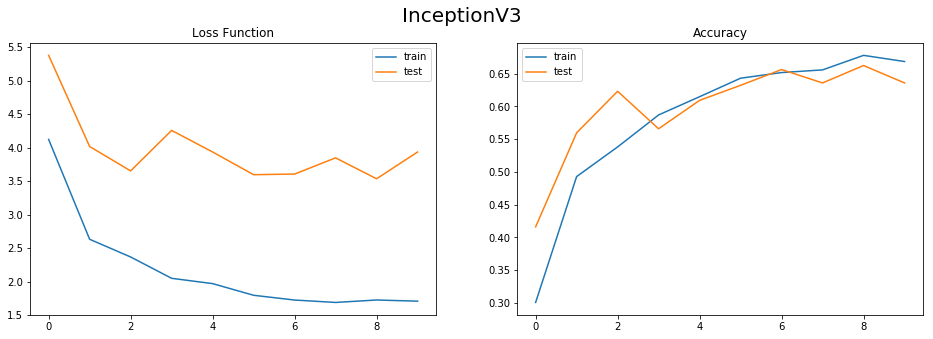

2744/2744 [==============================] - 4s 1ms/step
Test loss: 3.935812510137308
Test accuracy: 0.635932944606414


[3.935812510137308, 0.635932944606414]

In [19]:
## Procedemos a usar InceptionResNetV2
from keras.applications import InceptionV3
from keras.layers.normalization import BatchNormalization

# Se crea la red 
modelo_incV3 = InceptionV3(weights='imagenet',include_top=False, input_shape=(128,128,3))
modelo_incV3.trainable = False 
# Se crea la arquitectura
redINCV3 = models.Sequential()
redINCV3.add(modelo_incV3)
redINCV3.add(layers.Flatten())
redINCV3.add(layers.Dense(tamano_y, activation='softmax'))
# se compila y ejecuta  
redINCV3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_incV3 = redINCV3.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_steps=8,validation_data=(x_test, processed_y_test))
guardarResultado(resultado_incV3,redINCV3,'EXP1','InceptionV3')

## Análisis de Resultados

### Redes seleccionados y su enfoque
Para el desarrollo del trabajo actual , se seleccionaron cinco diferentes arquitecturas de redes convolucionales, con el fin de realizar un análisis de estas y compara los resultados que generan. A continuación se describen las arquitecturas y sus enfoques:
* **VGG16 / VGG19** : Presenta un arquitectura basada en una serie de capas convolucionales, agrupaciones máxima y capas de activación.
* **Xception (Inicio extremo)**: Su enfoque se fundamenta en la hipótesis de que " las correlaciones entre canales y las correlaciones espaciales están suficientemente desacopladas que es preferible no mapearlas conjuntamente ". Esto significa, asigna las correlaciones espaciales para cada canal de salida por separado y luego realiza una convolución en profundidad 1x1 para capturar la correlación de los canales cruzados.
* **Resnet (Redes residuales)** : Propone que los mapeos directos son difíciles de aprender,  es por ello que su solución proporciona a las capas un punto de "referencia" - X - para comenzar a aprender
* **Inception V3**: Su enfoque es la eficiencia computacional. Inception calcula múltiples transformaciones diferentes en el mismo mapa . Sin embargo este enfoque puede simplemente triplicar o cuadruplicar el número de filtros, es por ello que se utiliza una capa convolucional de 1x1 , que permite extraer información espacial y comprimirla a una dimensión más baja
<br> <br> Durante el despliegue de los modelos anteriormente descritos, se aplicó Data Augmentation para mejorar el entrenamiento y pruebas de los modelos. <br>




### Resultados de la ejecución

De los resultados globales el claro vencedor es el enfoque VGG, especialmente VGG16 alcanzando hasta un 78% de precisión, y muy cercano a este , se encuentra VGG19 con 75%. Los siguientes modelos en orden , son Inception V3, Xception y ResNet, siendo este último, el de peor performance de todos los experimentos.
<br> ResNet durante las ejecuciones presento un alto grado overfitting; para ello se adicionaron nuevas capas convolucionales, capas densas,  varios drop-out entre el 30% al 50% , pero el resultado no variaba mucho.
Después de analizar el problema e investigar más sobre el modelo,  se puede concluir que la red aprende bien el conjunto de entrenamiento, pero no es capaz de generalizarlo, por lo cual su desempeño en la prueba no es satisfactorio.
<br><br>
A continuación se visualiza los resultados obtenidos por los modelos:

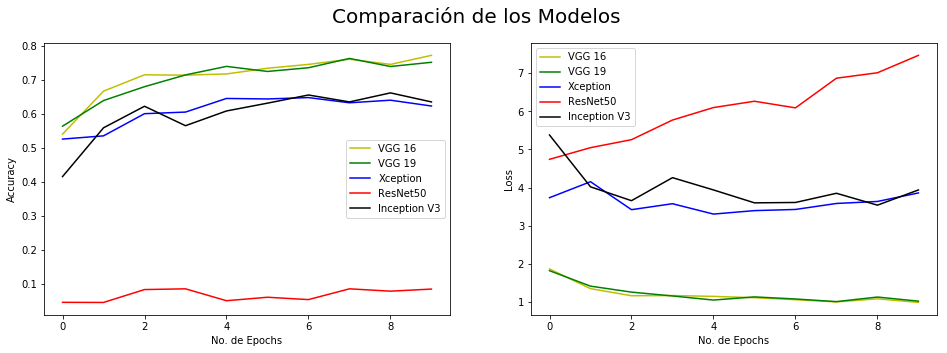

In [26]:
graficarComparaciones()


### Conclusiones del uso de los Modelos

Como parte del desarrollo de la actividad se realizó la ejecución de los modelos en su forma básica y también se agregaron capas y funciones con el fin de comparar el performance en ambos casos. 
<br> Para el desarrollo de estas nuevas configuraciones, se realizaron alrededor de 70 experimentos, en donde se incluyeron capas convolucionales, , maximun pooling, average pooling, capas densas, drop-out para evitar overfitting, diferentes activaciones y los resultados fueron contundentes, el pre-entrenamiento básico siempre tuvo un mejor performance que las nuevas arquitecturas propuestas.
<br> Durante estos experimentos, la única arquitectura que logro aproximarse a los modelos basicos, fue en la cual se adicionaron dos capas densas con drop out al 30%. Esto sucedió con VGG por su propia naturaleza convolucional.
<br>  Los resultados se pueden visualizar en la siguiente tabla , la cual representa los diferentes parametros utilizados y los resultados del modelo basico , y el modificado, siendo este último en donde se agregaron las configuraciones descritas anteriormente.


In [34]:
genenarTablaExperimentos()

          MODELO  BATCH SIZE  EPOCHS  ...  VALIDATION STEPS  BASICA MODIFICADA
0   modelo_incV3          34      10  ...                 -  '0.639     0.5820
1   modelo_incV3          34      10  ...                 8    0.66     0.5770
2   modelo_incV3          60      10  ...                 -   0.648     0.6300
3   modelo_incV3          60      10  ...                 8    0.64     0.5940
4   modelo_incV3         102       5  ...                 -   0.479     0.6112
5   modelo_incV3         102       5  ...                 8   0.584     0.6350
6   modelo_incV3          34      20  ...                 8  0.6552     0.6020
7   modelo_incV3          20      50  ...                86    0.62     0.5700
8       ResNet50          34      10  ...                 -   0.084     0.0853
9       ResNet50          34      10  ...                 8   0.085     0.0794
10      ResNet50          60      10  ...                 -   0.084     0.0794
11      ResNet50          60      10  ...           

# Escenario 2 
## Desde Cero

Para este enfoque se realizarón varias arquitecturas , en donde se mostrarán las dos que mejores dan resultados

W0624 07:13:05.336330 140289455642496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 07:13:05.393127 140289455642496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 07:13:05.404393 140289455642496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 07:13:05.448519 140289455642496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0624 07:13:05.476506 140289455642496 deprecation_wrapp

Epoch 1/10
75/75 [==============================] - 18s 237ms/step - loss: 4.3358 - acc: 0.1008 - val_loss: 3.9689 - val_acc: 0.1673
Epoch 2/10
75/75 [==============================] - 10s 131ms/step - loss: 3.7626 - acc: 0.2271 - val_loss: 3.6442 - val_acc: 0.2183
Epoch 3/10
75/75 [==============================] - 10s 130ms/step - loss: 3.4320 - acc: 0.2635 - val_loss: 3.4649 - val_acc: 0.2992
Epoch 4/10
75/75 [==============================] - 10s 133ms/step - loss: 3.2649 - acc: 0.2984 - val_loss: 3.0790 - val_acc: 0.3316
Epoch 5/10
75/75 [==============================] - 10s 131ms/step - loss: 3.1417 - acc: 0.3251 - val_loss: 2.9311 - val_acc: 0.3673
Epoch 6/10
75/75 [==============================] - 10s 133ms/step - loss: 2.9216 - acc: 0.3571 - val_loss: 2.7318 - val_acc: 0.3870
Epoch 7/10
75/75 [==============================] - 10s 135ms/step - loss: 2.7852 - acc: 0.3686 - val_loss: 2.6404 - val_acc: 0.4089
Epoch 8/10
75/75 [==============================] - 10s 129ms/step - 

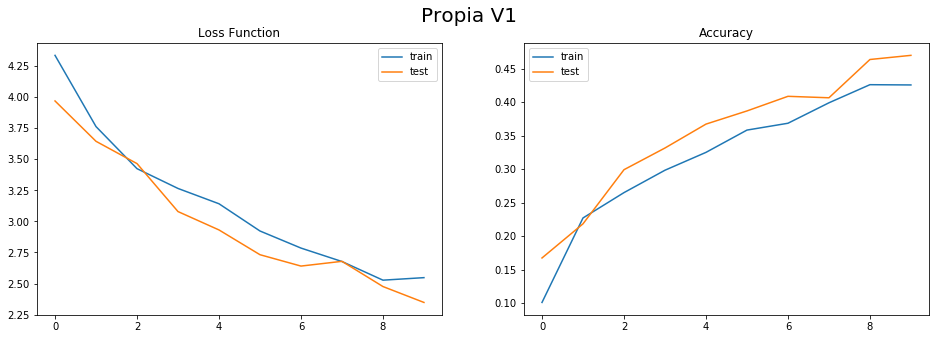

2744/2744 [==============================] - 2s 680us/step
Test loss: 2.3477581110362062
Test accuracy: 0.4701166179020273


[2.3477581110362062, 0.4701166179020273]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import models
from keras import layers
# Se crea la arquitectura
red = models.Sequential()
red.add(layers.Conv2D(4, (3,3), activation='relu', input_shape=(128,128,3)))
red.add(layers.Conv2D(8, (3,3), activation='relu'))
red.add(layers.AveragePooling2D((2,2)))
red.add(layers.Conv2D(32, (3,3), activation='relu'))
red.add(layers.Dropout(0.25))
red.add(layers.Conv2D(32, (3,3), activation='relu'))
red.add(layers.Dropout(0.25))
red.add(layers.Conv2D(64, (3,3), activation='relu'))
red.add(layers.Dropout(0.25))
red.add(layers.Conv2D(64, (3,3), activation='relu'))
red.add(layers.Dropout(0.25))
red.add(layers.MaxPooling2D((2,2)))
red.add(layers.Flatten())
red.add(layers.Dense(tamano_y, activation='linear'))
red.add(layers.Dense(tamano_y, activation='softmax'))
# se compila y ejecuta 
red.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_propia = red.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_steps=8,validation_data=(x_test, processed_y_test))
guardarResultado(resultado_propia,red,'EXP1','Propia V1')


Epoch 1/10
75/75 [==============================] - 11s 144ms/step - loss: 4.3108 - acc: 0.0914 - val_loss: 4.3213 - val_acc: 0.0798
Epoch 2/10
75/75 [==============================] - 10s 127ms/step - loss: 4.0268 - acc: 0.1478 - val_loss: 3.7413 - val_acc: 0.2358
Epoch 3/10
75/75 [==============================] - 9s 126ms/step - loss: 3.7049 - acc: 0.2285 - val_loss: 3.7341 - val_acc: 0.2230
Epoch 4/10
75/75 [==============================] - 10s 129ms/step - loss: 3.4646 - acc: 0.2737 - val_loss: 3.1636 - val_acc: 0.3229
Epoch 5/10
75/75 [==============================] - 10s 128ms/step - loss: 3.2635 - acc: 0.3008 - val_loss: 2.8795 - val_acc: 0.3502
Epoch 6/10
75/75 [==============================] - 10s 128ms/step - loss: 3.0193 - acc: 0.3378 - val_loss: 2.9867 - val_acc: 0.3473
Epoch 7/10
75/75 [==============================] - 10s 131ms/step - loss: 2.8177 - acc: 0.3675 - val_loss: 2.5495 - val_acc: 0.4195
Epoch 8/10
75/75 [==============================] - 10s 129ms/step - l

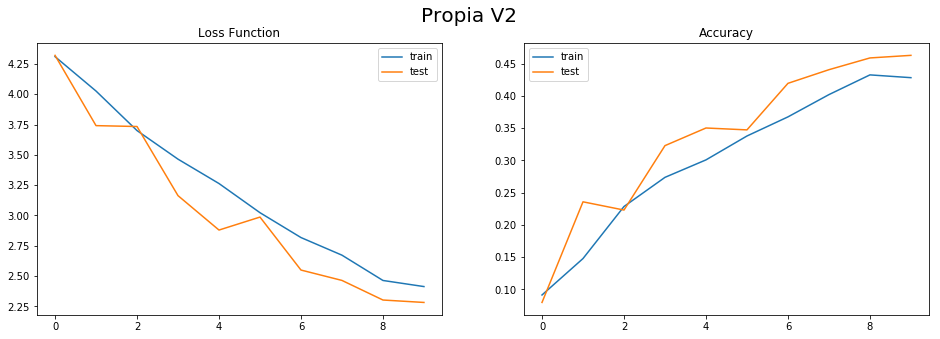

2744/2744 [==============================] - 2s 651us/step
Test loss: 2.28207699585239
Test accuracy: 0.46282798816441795


[2.28207699585239, 0.46282798816441795]

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import models
from keras import layers
# Se crea la arquitectura
red2 = models.Sequential()
red2.add(layers.Conv2D(4, (3,3), activation='relu', input_shape=(128,128,3)))
red2.add(layers.Conv2D(32, (3,3), activation='relu'))
red2.add(layers.Conv2D(32, (3,3), activation='relu'))
red2.add(layers.MaxPooling2D((3,3)))
red2.add(layers.Conv2D(64, (3,3), activation='relu'))
red2.add(layers.Conv2D(64, (3,3), activation='relu'))
red2.add(layers.MaxPooling2D((2,2)))
red2.add(layers.Conv2D(128, (3,3), activation='relu'))
red2.add(layers.Conv2D(128, (3,3), activation='relu'))
red2.add(layers.MaxPooling2D((2,2)))
red2.add(layers.Flatten())
 
red2.add(layers.Dense(tamano_y, activation='linear'))
red2.add(layers.Dense(tamano_y, activation='softmax'))
# se compila y ejecuta 
red2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
resultado_propia = red2.fit_generator(NewData.flow(x_train, processed_y_train,batch_size=34), epochs=10,steps_per_epoch=75,validation_steps=8,validation_data=(x_test, processed_y_test))
guardarResultado(resultado_propia,red2,'EXP2','Propia V2')

## Análisis de Resultados

### Redes creadas y su enfoque:

Para el desarrollo de este ejercicio se plantearon dos arquitecturas ,  con el fin de establecer cual tiene el mejor resultado. 
<br>
**Arquitectura – Propia V1**: 
* **Enfoque**: El modelo tiene un enfoque de uso de las redes convolucionales, con la aplicación de drop-out constantemente, lo cual además de evitar overfitting en los resultados, asegura que que al azar el 25% de su contribución a la activación de las neuronas siguientes se elimine temporalmente  y  así, cualquier actualización de peso no se aplique a la neurona en el pase hacia atras.<br>
La arquitectura finaliza con con dos capas densa, la primera con una activación lineal que proporciona un rango de activaciones interesante, que esta alineados con el objetivo de la actividad y la segunda con un softmax para darle cierre al modelo. Se aplica adicionalmente entre las redes convolucionales averga y max pooling estrategicamente para manejar los valores de la capa anterior.  
* **Arquitectura:**: 
El modelo se inicia con Secuencial, ya es la forma más fácil de construir un modelo en Keras y permite construir un modelo capa por capa.
Se agregan ahora las capas convolucionales que trabajaran con las imágenes de entrada, las cuales están como matrices bidimensionales. 4 en la primera capa y 8 en las segunda son el número de nodos en cada capa. Estas capas tendan un kernel de entre 3x3 y 2x2 con lo cual se realizaran el filtro.<br>
La función de activación que se utilizará para las capas es la ReLU ya que esta función de activación funciona bien en redes neuronales.
Durante los experimentos realizados,  se identifico que la precisión en el input a la capa convolucional inicial es clave para el desempleño de la red, es por ello que esta se define y  se adiciona el número 3 que significa que las imágenes se encuentra a color (RGB).<br>
Posterior a las capas de convolución se aplica Average Pooling 2D con el cual, se obtiene el valor promedio de cada uno de los clusters de neuronas de la capa anterior. A partir de allí se comienzan a integrar capas convolucionales con el fin que sigan trabajando en la imagen, las cuales se incrementa su tamaño de 32 a 64, y al finalizar cada capa, se aplica un dropout 25% que evite el overfitting en la capa y mejore así el aprendizaje de la misma. <br>
Posterior a estas ultimas 4 capas convolucionales , se aplica  Max Pooling 2D con el cual, se obtiene el máximo valor de cada uno de los clusters de neuronas de la capa anterior.<br>
Para ir concluyendo con la arquitectura , se agrega una capa 'Flatten', la cual permite realizar la conexión entre la convolución y las capas densas, cambiando de multidimensional a bidimensional los datos.<br>
Se añade una capa densa previo a la salida final, la cual tiene una activación lineal que proporciona un rango de activaciones, ya que no es una activación binaria, con lo cual se conectan y  se puede así aplicar softmax y finalizar la arquitectura.<br>
La capa densa final,  se activa con 'softmax', el cual hace que la suma de salida sea probabilistica (máximo 1) y así, el modelo luego hará su predicción en función de qué opción tiene la mayor probabilidad.
<br>

**Arquitectura – Propia V2**: 
* **Enfoque**: El modelo tiene un enfoque de uso de las redes convolucionales combinadas con técnicas de pooling para generar la arquitectura. En este enfoque se deja a un lado el drop-out y se enfoca  la activación de las capas densas.<br>
La arquitectura finaliza con con dos capas densa, la primera con una activación lineal que proporciona un rango de activaciones interesante, que esta alineados con el objetivo de la actividad y la segunda con un softmax para darle cierre al modelo. Se aplica adicionalmente entre las redes convolucionales averga y max pooling estrategicamente para manejar los valores de la capa anterior.  
* **Arquitectura:**: 
El modelo se inicia con Secuencial, ya es la forma más fácil de construir un modelo en Keras y permite construir un modelo capa por capa.
<br>Se definen bloques de dos capas convolucionales y un maxpooling. Estas  dos capas convolucionales tendran filtros 3 × 3, activación ReLU e inicialización con las características de la imagen. A estos les seguirá una capa de agrupación máxima con un kernel de 3 × 3, coincidiendo así sus kernels para obtener un mejor resultado. Tres de estos bloques se utilizarán con 32, 64 y 128 filtros respectivamente.<br>
La salida de la capa de agrupación final se aplanará 'Flatten' y se enviará a una capa completamente conectada para su interpretación y, finalmente, a una capa de salida para la predicción.<br>
Se aplica las mismas características de la últimas capas densas, que en la arquitectura propia 1


### Resultados de la ejecución

De los resultados globales, las arquitecturas propias mantienen un rango semejante de precisión.<br>
Si estos modelos los comparamos con las arquitecturas analizadas en la primera etapa del ejercicio, seria ampliamente superado por todos los algoritmos a excepción de Resnet que sus resultados son inferiores.<br>

Esta ejecución permitió identificar :
*	La importancia de aplicar drop-out a las redes convolucionales para mejorar su performance
*	Asegurar que el input de la primera capa convolucional este siempre definido 
*	La importancia del uso correcto de las activaciones, ya que durante los experimentos podrían afectar más de la mitad de la asertividad por esta característica
* La combinación de las capas densas linear y softmax trabajan muy bien juntas, ya que se realizaron pruebas con otras activaciones y softmax, dando resultado muy inferiores a los obtenidos en ambas arquitecturas propias


<br>A continuación se visualiza los resultados obtenidos por los modelos:



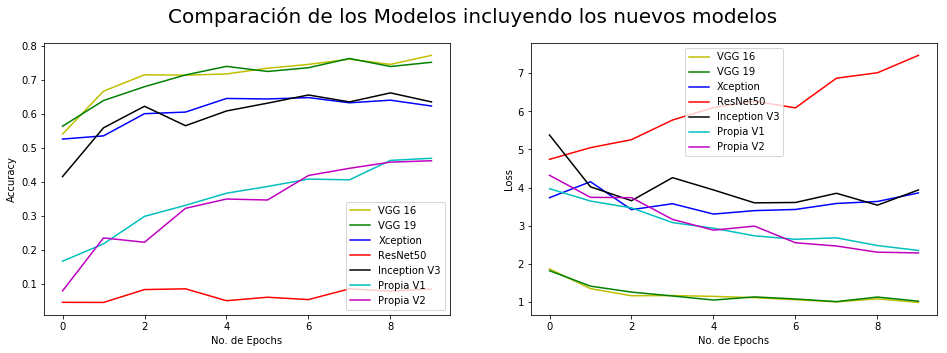

In [6]:
graficarComparaciones2()